### Ivy Qiu

# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv('bank-additional-full (1).csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

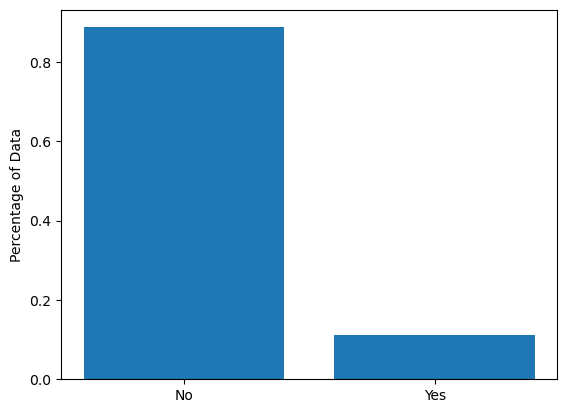

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
from imblearn.over_sampling import SMOTE

# Transforming the target using SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.299\nsamples = 20023\nvalue = [16367, 3656]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.114\nsamples = 10601\nvalue = [9959, 642]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.097\nsamples = 10397\nvalue = [9868, 529]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 204\nvalue = [91, 113]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.435\nsamples = 9422\nvalue = [6408, 3014]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.489\nsamples = 6860\nvalue = [3934, 2926]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.066\nsamples = 2562\nvalue = [2474, 88]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.417\nsamples = 31137\nvalue = [9213, 21924]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.827\ngini = 0.337\nsamples = 25616\nvalue = [5490, 20126]\nclass 

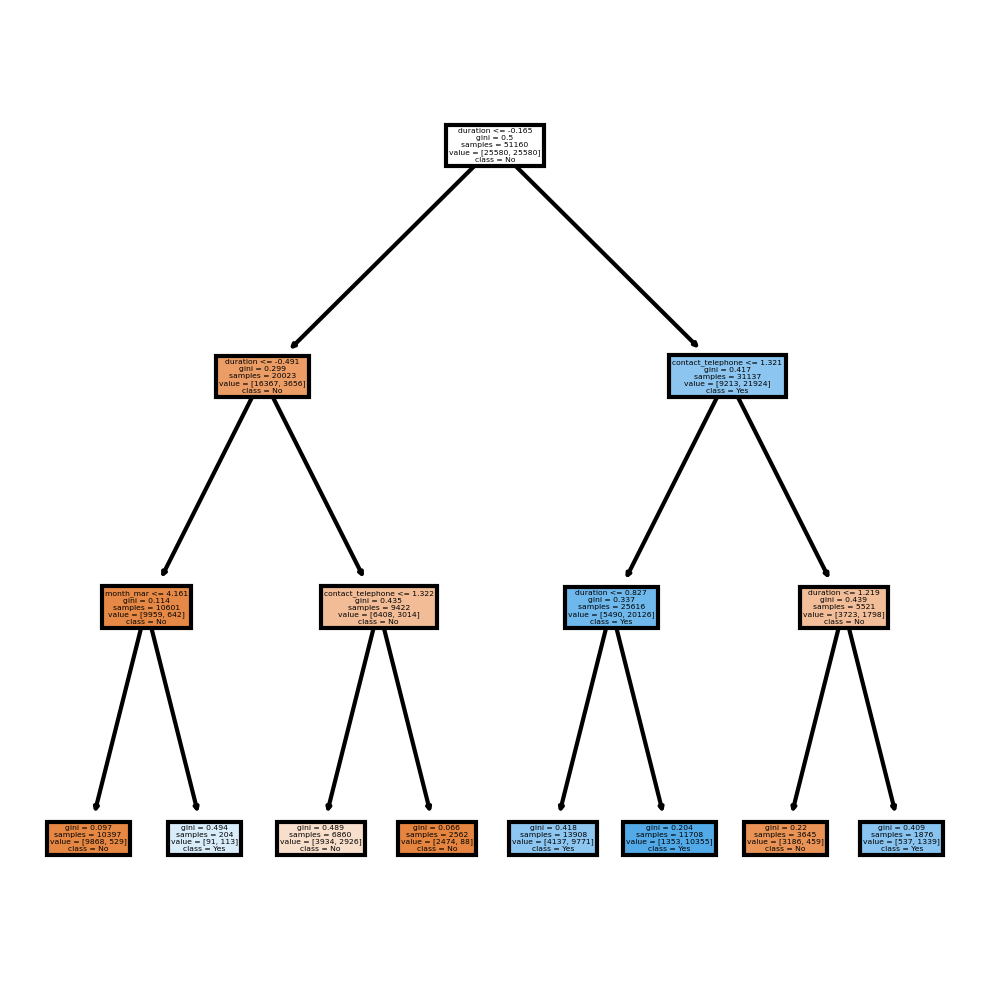

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [16]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

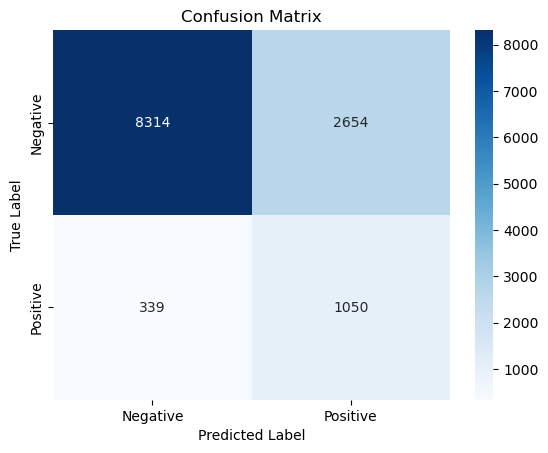

In [17]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [18]:
#placeholder for optimizing max depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [19]:
bagging = BaggingClassifier(estimator = dtree,
                            n_estimators = 100,
                            max_samples = .5,
                            max_features = 1.)

In [20]:
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)

/Users/qyc/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

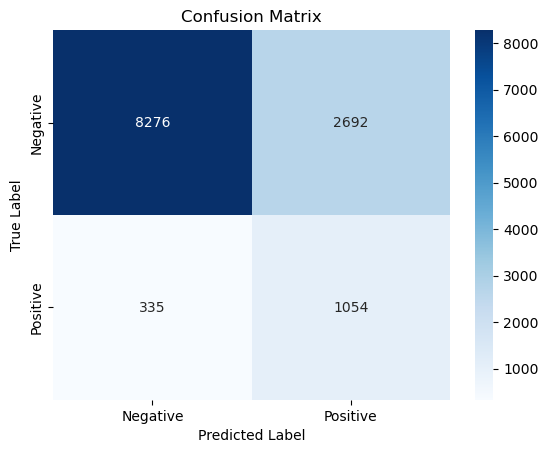

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
#placeholder for optimizing max depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [26]:
boost = AdaBoostClassifier(estimator = dtree,
                          n_estimators = 100,
                          learning_rate =.1)

In [27]:
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

/Users/qyc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


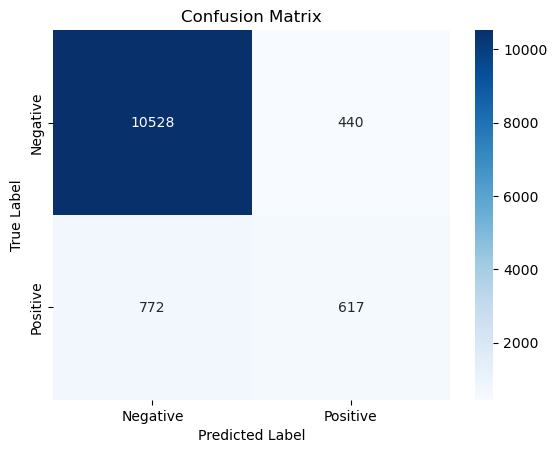

In [28]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
base_predictions = [list(dtree_main.predict(X_scaled)), 
                    boost.predict(X_scaled), 
                    bagging.predict(X_scaled)]

In [31]:
n = len(base_predictions[0])

In [32]:
#base_predictions = [np.array(base_predictions)[:,i] for i in range(n)]

In [33]:
base_predictions = np.array(base_predictions).transpose()

In [34]:
super_learner = LogisticRegression()

In [35]:
super_learner.fit(base_predictions, y_train)

/Users/qyc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
super_learner.coef_

array([[0.29877132, 5.09927477, 1.08743737]])

Coefficient for Decision Tree Predictions (0.29877132): This coefficient is relatively small compared to the others, suggesting that while the decision tree's predictions have some influence on the final prediction, they are less influential than the boosting model's predictions. It still plays a role in contributing to the overall prediction, but it's not as dominant.

Coefficient for Boosting Model Predictions (5.09927477): This is the largest coefficient among the three, indicating that the predictions from the boosting model have the most significant impact on the final prediction of the super learner. A change in the boosting model's prediction is likely to have a larger effect on the super learner's output than changes in the other models' predictions.

Coefficient for Bagging Model Predictions (1.08743737): This coefficient suggests that the bagging model's predictions have a moderate influence on the super learner's final prediction. It's more influential than the decision tree model but less so than the boosting model.

# 6.)